In [1]:
"""
    1. Given Alpha prameters, we need to reconstruct pictures. 
    2. Evaluation by comparing with observed cross-image correlation
"""
def readData(string):
    mat = sio.loadmat(string)
    header = mat.keys()
    experiment = np.array([[a[1][0][0],a[3][0][0],a[4][0][0]] for a in mat[header[0]][0]])
    loc = (mat[header[3]])[0][0][7]
    rawdata = np.array([s[0] for s in mat[header[5]][:,0]])
    ##preprocessing
    ground_mean = np.mean(rawdata, axis=0)
    ground_std = np.std(rawdata, axis =0)
    a = (rawdata-ground_mean)/ground_std
    bound = np.max(abs(a))
    scale_data = a/bound
    return (scale_data, loc, experiment)
 

In [2]:
from __future__ import division 
import numpy as np
import seaborn as sns
import scipy.io as sio
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
#import TFA
%matplotlib inline
def RBF(r, mu, Lambda):
    '''
    RBF kernel function described in equation (1)
    ----------------------
    Return:
    scalar 
    '''
    assert len(r)==len(mu)==3
    return np.exp((-(np.dot(np.transpose(r-mu), r-mu))/(np.exp(Lambda))))

In [3]:
'''
    mu = np.ones((5,3))
    l = (np.arange(5)+1)*.01
    w = np.ones((10,5))*.2
    v = np.arange(30).reshape((10,3))
    alpha = {'mu_w_n_k':w, 'mu_mu_k':mu,'mu_lambda_k': l}
    F = F_posterior(alpha, v)
    haha = act_mat(alpha,F)
    #map_mat(haha)
    Y, loc,experiment  = readData('../data/data-science-P1.mat')
    loc0 = loc[:10,]
    map_mat(haha,loc0,9,1)
'''

"\n    mu = np.ones((5,3))\n    l = (np.arange(5)+1)*.01\n    w = np.ones((10,5))*.2\n    v = np.arange(30).reshape((10,3))\n    alpha = {'mu_w_n_k':w, 'mu_mu_k':mu,'mu_lambda_k': l}\n    F = F_posterior(alpha, v)\n    haha = act_mat(alpha,F)\n    #map_mat(haha)\n    Y, loc,experiment  = readData('../data/data-science-P1.mat')\n    loc0 = loc[:10,]\n    map_mat(haha,loc0,9,1)\n"

In [4]:
def F_posterior(alpha, voxel):
    '''
    F_posterior matrix 
    --alpha: dictionary, format can be referred from TFA
    --voxel: 2d array, V*D, represent all voxels' location
    --return: 2d array, K*V
    '''
    mu_mat = alpha['mu_mu_k']
    lambda_array = alpha['mu_lambda_k']
    K = mu_mat.shape[0]
    V = voxel.shape[0]
    F_mat = np.empty((K, V))
    for i in np.arange(K):
        for j in np.arange(V):
            F_mat[i,j] = RBF(voxel[j],mu_mat[i],lambda_array[i])
    return F_mat

In [5]:
def act_mat(alpha, F_mat):
    '''
    activation_map matrix
    ---alpha: dictionary, format can be refered from TEA
    ---F_mat: 2d array, K*V, returned value from F_posterior function
    ---return: 2d array, N*V.
    '''
    W = alpha['mu_w_n_k']
    return W.dot(F_mat)

In [6]:
def map_mat(data, loc, i, slice,lower,upper):
    draw3d= data[i]
    draw2d = draw3d[loc[:,2]==slice]
    xy = (loc[loc[:,2]==slice,:2])
    drawmat = np.empty((64,64))
    drawmat[:] = np.nan
    count = 0
    for idx in xy:
        drawmat[idx[0],idx[1]] = draw2d[count]
        count+=1      
    masked_array = np.ma.array (drawmat, mask=np.isnan(drawmat))
    cmap = plt.cm.rainbow
    #cmap ='cubehelix'
    cmap.set_bad('w',1.)
    cax= plt.imshow((masked_array), interpolation='nearest', cmap=cmap,vmin=lower, vmax=upper)


     # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = plt.colorbar(cax, ticks=[lower, .5*(lower+upper), upper],orientation='horizontal')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(slice)

In [7]:
def nine_map(act_val, loc, lower, upper):
    fig = plt.figure(1)
    fig.add_subplot(331)
    map_mat(act_val,loc,1,1, lower, upper)
    fig.add_subplot(332)
    map_mat(act_val,loc,1,2, lower, upper)
    fig.add_subplot(333)
    map_mat(act_val,loc,1,3, lower, upper)

    fig.add_subplot(334)
    map_mat(act_val,loc,1,4, lower, upper)
    fig.add_subplot(335)
    map_mat(act_val,loc,1,5, lower, upper)
    fig.add_subplot(336)
    map_mat(act_val,loc,1,6, lower, upper)

    fig.add_subplot(337)
    map_mat(act_val,loc,1,7, lower, upper)
    fig.add_subplot(338)
    map_mat(act_val,loc,1,8, lower, upper)
    fig.add_subplot(339)
    map_mat(act_val,loc,1,9, lower, upper)

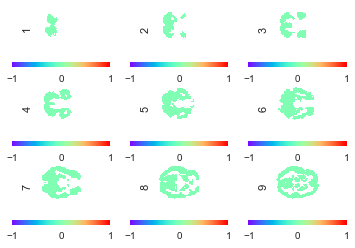

In [22]:
def main():
    with open('../data/alpha_30_bad.save', 'rb') as handle:
        alpha = pickle.load(handle)
    Y, loc,experiment  = readData('../data/data-science-P1.mat')
    F_mat= F_posterior(alpha, loc)
    act_val= act_mat(alpha,F_mat)
    #low_bound = min(np.min(Y),np.min(act_val))
    #upper_bound = max(np.max(Y),np.max(act_val))
    a = -1
    b = 1
    nine_map(act_val, loc, a,b)
    #nine_map(Y, loc, a,b)
    #plt.savefig("../results/new_reconstruction_refrigerator.pdf")
    #low_bound = -0.5
    #upper_bound = 0.5
    #nine_map(Y,loc, a,b)
    #plt.savefig("../results/new_refrigerator.pdf")
    #sns.distplot(act_val.reshape((360*21764)),axlabel="scaled activation value")
if __name__ == "__main__":
    main()
    

In [10]:
with open('../data/alpha_50.save', 'rb') as handle:
        alpha = pickle.load(handle)

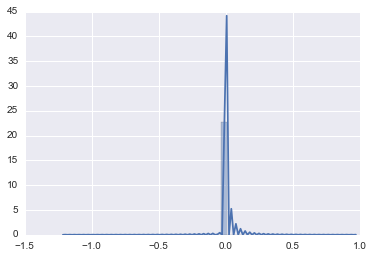

In [23]:
with open('../data/alpha_30_bad.save', 'rb') as handle:
    alpha = pickle.load(handle)
Y, loc,experiment  = readData('../data/data-science-P1.mat')
F_mat= F_posterior(alpha, loc)
act_val= act_mat(alpha,F_mat)
sns.distplot(act_val.ravel())

In [27]:
elbo = np.loadtxt('/Users/ningli/elbo_result.txt')

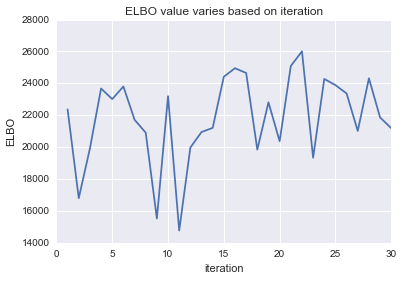

In [36]:
plt.plot(np.arange(30)+1, elbo)
plt.xlabel("iteration")
plt.ylabel("ELBO")
plt.title("ELBO value varies based on iteration")
#plt.show()
plt.savefig("../results/ELBO_iteration.png")

(array([ 3.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  1.]),
 array([-3.60222025, -2.93160665, -2.26099305, -1.59037945, -0.91976585,
        -0.24915226,  0.42146134,  1.09207494,  1.76268854,  2.43330214,
         3.10391574]),
 <a list of 10 Patch objects>)

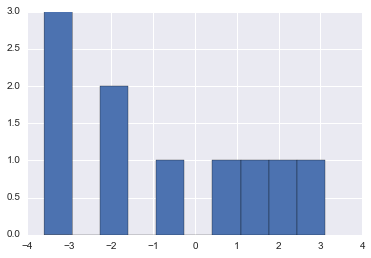

In [51]:
a = alpha['mu_w_n_k']


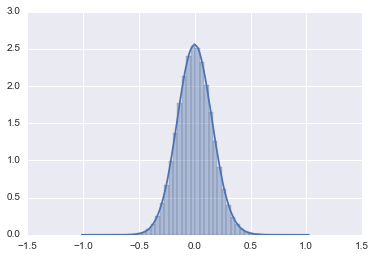

In [19]:
sns.distplot(Y.ravel())

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Generate data:
x, y, z, d = 10 * np.random.random((4,10))

# Set up a regular grid of interpolation points
xi, yi, zi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100), np.linspace(z.min(), z.max(), 100)
xi, yi, zi = np.meshgrid(xi, yi, zi)

In [35]:
mu = np.array([0,0,0])
x = np.random.random((100,3))*10
Lambda = 5
rep = []
for i in np.arange(100):
    rep.append(RBF(x[i,:], mu, Lambda))
rep = np.array(rep)
rep_mat = rep.reshape((10,10))
#plt.imshow(rep_, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x[0,:], y[0,:], c=rep)
plt.colorbar()
plt.show()

IndexError: too many indices for array

In [66]:
Y, loc,experiment  = readData('../data/data-science-P1.mat')
   
xy = (loc[loc[:,2]==3,:2])
xy
mu = np.array([21,10,3])
Lambda = .5


ValueError: bottom cannot be >= top

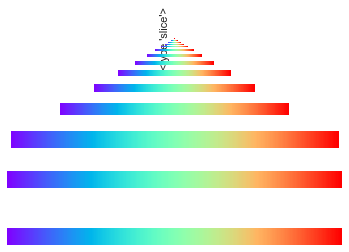

In [67]:
drawmat = np.empty((64,64))
drawmat[:] = np.nan
count = 0
for idx in xy:
    drawmat[idx[0],idx[1]] = RBF(np.array([idx[0],idx[1],3]), mu, Lambda)
    count+=1      
    masked_array = np.ma.array (drawmat, mask=np.isnan(drawmat))
    cmap = plt.cm.rainbow
    #cmap ='cubehelix'
    lower = np.min(drawmat)
    upper = np.max(drawmat)
    cmap.set_bad('w',1.)
    cax= plt.imshow((masked_array), interpolation='nearest', cmap=cmap,vmin=lower, vmax=upper)


     # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = plt.colorbar(cax, ticks=[lower, .5*(lower+upper), upper],orientation='horizontal')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(slice)